Digital signal processing (DSP) is the computation of mathematical methods used to manipulate signal data [**[1]**](https://doi.org/10.1016/B978-0-08-097768-3.00011-8). One of the most important tools in digital signal processing is the Discrete Fourier Transform (DFT). It is usually used to produce a signal's frequency-domain (spectral) representation [**[2]**](https://doi.org/10.1016/B978-0-08-099388-1.00003-0).

In this notebook, we will discuss how DFT works and how to implement it to output the spectrum of the signals.

# **Discrete Fourier Transform (DFT)**

The Fourier Transform, the mathematical backbone of the DFT, is the main idea behind Spectral Decomposition which concludes that a signal is nothing but a sum of sinusoids of different frequency components [**[3]**](https://biblioteca.unisced.edu.mz/bitstream/123456789/1667/1/thinkdsp.pdf). Since all of the signal data we are working with are in digital form, a signal is a set of samples in the time domain. The Fourier transform on such discrete signals can be done using the Discrete Fourier Transform, which we can use to switch back and forth between the time and the frequency domains. The time domain contains the samples of the signal, whereas the frequency domain represents the spectrum of the sinusoids that construct the signal [**[4]**](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=da18cc0dc47a2e9f829bf752e86a985d0dcc22f3).

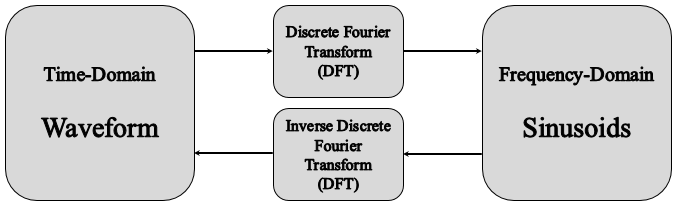

Mathematically speaking, if we have a signal ($x_n$) with $N$ samples, the DFT of this signal is defined as [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html):
$$X_k=\sum_{n=0}^{N-1} x_n⋅e^{−i2\pi kn/N}=\sum_{n=0}^{N−1}x_n[cos(2\pi kn/N)−i⋅sin(2\pi kn/N)]$$


**Where:**
- $N$ : Number of samples
- $n$ : Current sample
- $k$ : Current frequency where $k \in [0, N-1]$
- $x_n$ : The sine value at sample n
- $X_k$ : The DFT which include in information of both amplitude and phase

The output of the DFT $(X_k)$ is an array of complex numbers that hold the information on the frequencies, amplitudes, and phases of sinusoids that construct the input signal. The first half of the DFT array $(X_k)$ contains the positive frequency terms, while the second half contains the negative frequency terms. Also, when the input signal is only a real-valued signal, the first half is the conjugate of the second half of frequency terms and the spectrum is symmetric. So, we focus only on the first half (the positive frequency terms) in the case of real-valued signals [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html). The figure below represents each of the positive and the negative frequency terms in case the number of the input samples $(N)$ is odd or even.

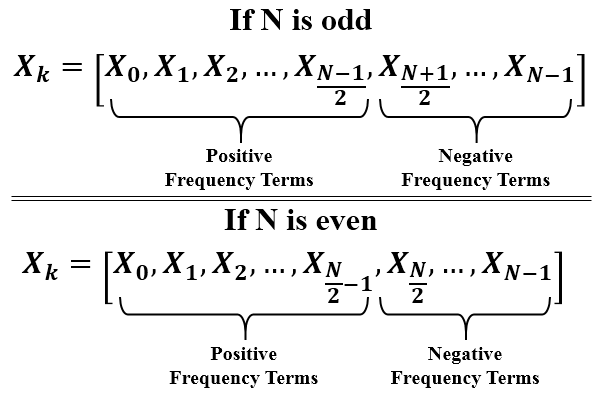


The amplitude and the phase of each sinusoid that adds up to construct the signal can be calculated from the complex array $(X_k)$ as follows ($Im$, and $Re$, are for Imagery and Real parts of a complex number, respectively) [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html):

$$amplitude = {|X_k|}/{N} = \frac{\sqrt{Re^2(X_k)+Im^2(X_k)}}{N}$$

$$phase = atan2(Im(X_k), Re(X_k))$$

## **Let's Code:**
We will build a function that calculates DFT based on the first equation above. But first, we should generate the signal that we want to use as an input for DFT. We will generate a signal that is a sum of 3 sine waves with frequencies (1,20,10)Hz and amplitudes (3,1,0.5). The sampling rate will be 200 samples per second. For generating the signal, I used a class, Signal, that you can use as well following [**this GitHub gist**](https://gist.github.com/OmarAlkousa/4bd0bacb0ff976be4105777965854e06). You can easily generate any signal but I used this Signal class for more controllability.


**Note**:
- The DFT and IDFT functions we will write below are released under the MIT license and all credits go to the authors of [**this book**](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).
- Both of the functions we will discuss are just to understand what is the mathematics behind DFT and what is the output of such transform. In practical use, there are faster and more efficient algorithms that can calculate the Fourier Transform, Fast Fourier Transform (FFT), and its inverse.

**Let's get started...**

In [ ]:
# Import the required packages
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.
  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.
    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal
    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal
    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

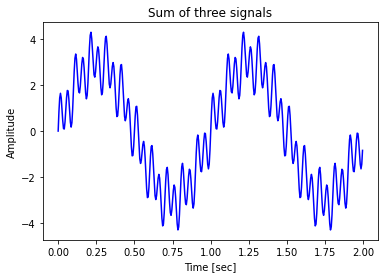

In [ ]:
# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

Now we will build the DFT function to give us the sinusoids that construct the signal we generated above. Make sure to carefully read the comments on the code below as it helps you conduct the output of each line.

<ipython-input-4-aaeea54602de>:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, amp, 'b', markerfmt='o', basefmt='b')


Text(0.5, 1.0, 'Spectrum of the signal')

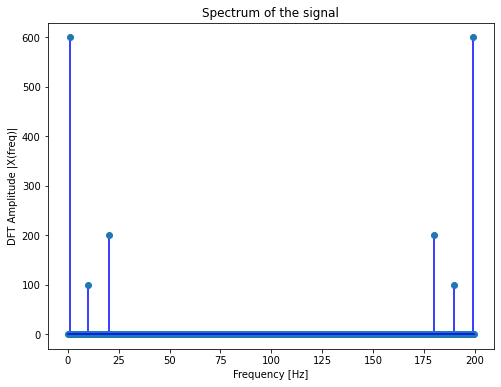

In [ ]:
# Build a function that calculates the discrete Fourier transform
def DFT(signal):
  # Number of samples, 100 samples in our example
  N = len(signal)
  # The samples from 0 to N-1, [0, 1, 2, ..., 199] in our example
  n = np.arange(N)
  # Generate the frequencies, [[0], [1], [2], ..., [199]] in our example
  k = n.reshape((N,1))
  # e is a matrix of complex numbers with a shape of (N, N), (200, 200) in our example
  e = np.exp(-2j * np.pi * k * n / N)
  # dft is a matrix of complex numbers with a shape of (N,), (200,) in our example
  dft = np.dot(e,signal)
  return dft

# Let's use the function
dft = DFT(signal= signal)

# Calculate the amplitude spectrum of the signal
amp = np.abs(dft)

# Generate the frequency axis
N = len(dft)
n = np.arange(N)
T = N/signal_1hz.sampling_rate
freq = n/T

# Plot the spectrum
plt.figure(figsize = (8, 6))
plt.stem(freq, amp, 'b', markerfmt='o', basefmt='b')
plt.xlabel('Frequency [Hz]')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('Spectrum of the signal')

The x-axis contains the frequency components that construct the signal. The y-axis represents the strength of each frequency component. The lowest frequency component in the spectrum is usually called the **Fundamental Frequency** and the frequency component with the largest amplitude is called the **Dominant Frequency** [**[3]**](https://biblioteca.unisced.edu.mz/bitstream/123456789/1667/1/thinkdsp.pdf). In our example above, the 1Hz frequency component is the fundamental and the dominant frequency.

We can notice the symmetry of the spectrum at half of the sampling rate (try different rates); this is usually called the **folding frequency**. When recording a real-world signal (f(t)) with FN as the highest frequency component, the folding frequency should never go below FN to retrieve all of the signal's information. And that's according to **Nyquist-Shannon Theorem** [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html).


We can get the actual amplitude of the spectrum by normalizing it to the number of input samples $(N)$. But when we focus only on the first half of the spectrum, in case the input is a real-valued signal, we normalize the spectrum by $N/2$ [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html). The code below is to normalize the first half of the spectrum $[0,N/2]$ and to plot the spectrum.

<ipython-input-5-7326cc26a1e4>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f_oneside, np.abs(one_side_dft))


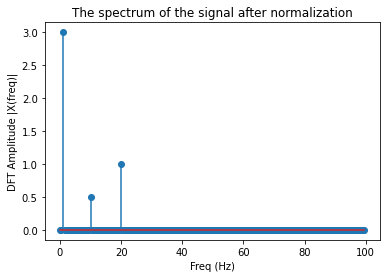

In [ ]:
# Get the length of one side of frequencies
n_oneside = N//2
# Get the one side frequency
f_oneside = freq[:n_oneside]
# Normalize the amplitude by N/2
one_side_dft = dft[:n_oneside]/n_oneside

# Plot the first half
plt.stem(f_oneside, np.abs(one_side_dft))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('The spectrum of the signal after normalization')
plt.show()

# **Inverse Discrete Fourier Transform (IDFT)**
Similarly, as you can go from the time domain to the frequency domain, you can get back from the frequency domain to the time domain using the Inverse Discrete Fourier Transform. This process is very useful in signal processing when you want to filter specific frequency components from the signal using DFT and then retrieve the signal back to its time domain using IDFT. The IDFT can be calculated from the $X_k$ sequence following the equation [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html):


$$x_n = \frac{1}{N} \sum_{k=0}^{N-1}X_k.e^{i2\pi kn/N}$$

Let's build a function that can calculate the IDFT using the equation above.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


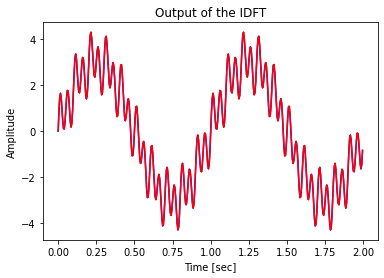

In [ ]:
def IDFT(dft):
  # Number of frequencies, 200 components in our example
  N = len(dft)
  # The frequencies from 0 to N-1, [0, 1, 2, ..., 199] in our example
  k = np.arange(N)
  # Generate the samples, [[0], [1], [2], ..., [199]] in our example
  n = k.reshape((N,1))
  # If your input was a first half spectrum, 2j should be 1j to retrieve the signal
  e = np.exp(2j * np.pi * k * n / N)
  # dft is a matrix of complex numbers with a shape of (N,), (200,) in our example
  signal = np.dot(e,dft)/N
  return signal

# Apply the Inverse Fourier Transform on the spectrum [dft]
sig = IDFT(dft)

# Generate the time axis from sampling rate and length of dft
N = len(dft)
duration = N/signal_1hz.sampling_rate
time_axis = np.arange(0, 2, 1/200)

# Plot the results of IDFT along with the original signal
plt.plot(time_axis, sig,'b')
plt.plot(time_axis, signal, 'r')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Output of the IDFT')
plt.show()

# **The limit of DFT**
In the case of a signal with a big number of samples, the execution time of the DFT function will be long to apply the Fourier Transform on all of the data points of the signal. Fortunately, an efficient algorithm to calculate the DFT of the signal has been developed, the Fast Fourier Transform (FFT). This algorithm reduces the execution complexity from $O(N^2)$ to only $O(Nlog{N})$, where $N$ is the size of the data. The significant reduction of computation complexity by using FFT allows the wide use of Fourier Transform in engineering, science, and mathematics fields [**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html).


Python provides multiple functionalities that the user can use to apply Fourier Transform using Numpy or Scipy python packages. The code below represents the comparison of time execution using the DFT function we built above, the FFT using the Numpy package [**[6]**](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html), and the FFT Scipy package [**[7]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html). Using FFT from the Scipy package was the fastest.

In [ ]:
from scipy.fftpack import fft

# Estimate the execution time of DFT using the function we've built
print('Execution time of DFT Function:')
%timeit DFT(signal)
# Estimate the execution time of DFT using FFT from numpy package
print('\nExecution time of FFT using Numpy pacakge:')
%timeit np.fft.fft(signal)
# Estimate the execution time of DFT using FFT from scipy package
print('\nExecution time of FFT using Scipy package:')
%timeit scipy.fftpack.fft(signal)

Execution time of DFT Function:
17.3 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Execution time of FFT using Numpy pacakge:
8.72 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Execution time of FFT using Scipy package:
8.27 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# **Conclusion**

- We've learned how useful the Fourier Transform is in the signal processing field. And we've understood the main idea behind it.

- We've pointed out the mathematical perspective of the Discrete Fourier Transform and how it can be calculated for a discrete signal.

- We've built a function that calculates the DFT using the mathematical equation and we applied the function to a signal we generated using a class Signal we've built in this previous post.

- We've learned that the output of the DFT is an array of complex numbers with N number of elements, the same as the number of samples of the input signal. These complex numbers hold information on the amplitude and the phase of the spectrum.

- We've seen that the output of the DFT will be symmetrical to half of the sampling rate if the input signal is a real-value signal. And this is why we focus only on the positive frequency components.

- An equation to calculate the Inverse Discrete Fourier Transform, IDFT, has been pointed out. And we've built a function to calculate the IDFT to retrieve the original signal from the spectrum.

- We've discussed the limitation of the functions we've built and there is an efficient algorithm to calculate the Fourier transforms, Fast Fourier Transform.

# **References**

[**[1]**](https://doi.org/10.1016/B978-0-08-097768-3.00011-8) R. Toulson, R., & Wilmshurst, T. (2012). An Introduction to Digital Signal Processing. *Fast and Effective Embedded Systems Design* (pp. 219–242). Elsevier. https://doi.org/10.1016/B978-0-08-097768-3.00011-8


[**[2]**](https://doi.org/10.1016/B978-0-08-099388-1.00003-0) T. Giannakopoulos, T., & Pikrakis, A. (2014). Signal Transforms and Filtering Essentials. *Introduction to Audio Analysis* (pp. 33–57). Elsevier. https://doi.org/10.1016/B978-0-08-099388-1.00003-0


[**[3]**](https://biblioteca.unisced.edu.mz/bitstream/123456789/1667/1/thinkdsp.pdf) Downey, A. (2016). Sounds and Signals. *Think DSP: Digital signal processing in Python* (pp. 1-11). (First edition). O’Reilly Media, Inc.

[**[4]**](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=da18cc0dc47a2e9f829bf752e86a985d0dcc22f3) Thakur, B., & Mehra, R. (2016). Discrete Fourier Transform Analysis with Different Window Techniques Algorithm. International Journal of Computer Applications, 975, 8887.

[**[5]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html) Kong, Q., Siauw, T., & Bayen, A. (2020). Fourier Transform. *Python programming and numerical methods: A guide for engineers and scientists* (pp. 415-444). Academic Press.

[**[6]**](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) Numpy Documentation, API Reference, Discrete Fourier Transform (numpy.fft). [Accessed at 2/2/2023]

[**[7]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html) Scipy Documentation, API Reference, Legacy discrete Fourier transform (scipy.fftpack). [Accessed at 2/2/2023]